In [39]:
#cd '/content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_3/Day_10'

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시도1

## Data Get

In [99]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [101]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


## Data Preprocessing

In [44]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])

    X = np.concatenate([X_party1.toarray(), X_party2.toarray(), X_facts.toarray()], axis=1)
    return X

In [45]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [46]:
print(f'X_trian 차원 = {X_train.shape}')
print(f'Y_trian 차원 = {Y_train.shape}')
print(f'X_test 차원 = {X_test.shape}')

X_trian 차원 = (2478, 52377)
Y_trian 차원 = (2478,)
X_test 차원 = (1240, 52377)


In [47]:
vocab_size = len(X_train[0])
print(vocab_size)

52377


## Define Model & Train (Logistic Regression)

In [48]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [49]:
#submit = pd.read_csv('law_sample_submission.csv')
submit = pd.read_csv('/content/drive/MyDrive/skt/judgment/sample_submission.csv')

In [50]:
pred = model.predict(X_test)

In [51]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)

In [52]:
submit

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,0
1236,TEST_1236,1
1237,TEST_1237,1
1238,TEST_1238,1


## Define Model & Train (LSTM)

In [53]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE

In [54]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
78/78 [==============================] - 110s 1s/step - loss: 0.6479 - accuracy: 0.6630
Epoch 2/5
78/78 [==============================] - 106s 1s/step - loss: 0.6389 - accuracy: 0.6655
Epoch 3/5
78/78 [==============================] - 106s 1s/step - loss: 0.6397 - accuracy: 0.6655
Epoch 4/5
78/78 [==============================] - 106s 1s/step - loss: 0.6382 - accuracy: 0.6655
Epoch 5/5
78/78 [==============================] - 106s 1s/step - loss: 0.6392 - accuracy: 0.6655


In [56]:
pred = model.predict(X_test)

39/39 [==============================] - 22s 553ms/step


In [57]:
lstm_submit = submit

In [58]:
lstm_submit

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
...,...,...
1235,TEST_1235,0
1236,TEST_1236,1
1237,TEST_1237,1
1238,TEST_1238,1


In [59]:
l_model = Sequential()

l_model.add(LSTM(units=128, input_shape=(vocab_size, 1)))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=64, activation='relu'))
l_model.add(Dropout(0.3))
l_model.add(Dense(units=1, activation='sigmoid'))
l_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

l_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 74881 (292.50 KB)
Trainable params: 74881 (292.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
#모델의 val_loss가 3epoch 동안 동일하면 학습을 중단

history = l_model.fit(X_train, Y_train, epochs=3, callbacks=[early_stopping])

Epoch 1/3
78/78 [==============================] - 106s 1s/step - loss: 0.6376 - accuracy: 0.6655
Epoch 2/3
78/78 [==============================] - 106s 1s/step - loss: 0.6411 - accuracy: 0.6655
Epoch 3/3
78/78 [==============================] - 106s 1s/step - loss: 0.6391 - accuracy: 0.6655


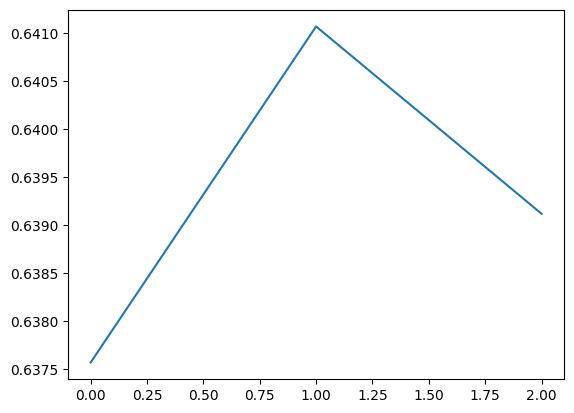

In [62]:
import matplotlib.pyplot as plt
myloss = l_model.history.history['loss']
plt.plot(range(len(myloss)), l_model.history.history['loss'])

In [63]:
pred = l_model.predict(X_test)

39/39 [==============================] - 22s 554ms/step


In [64]:
pred

array([[0.693596  ],
       [0.693596  ],
       [0.693596  ],
       ...,
       [0.693596  ],
       [0.693596  ],
       [0.69359565]], dtype=float32)

In [65]:
lstm_submit2 = submit
lstm_submit2['first_party_winner'] = pred

In [66]:
lstm_submit2

,ID,first_party_winner
0,TEST_0000,0.693596
1,TEST_0001,0.693596
2,TEST_0002,0.693596
3,TEST_0003,0.693596
4,TEST_0004,0.693596
...,...,...
1235,TEST_1235,0.693596
1236,TEST_1236,0.693596
1237,TEST_1237,0.693596
1238,TEST_1238,0.693596


In [67]:
lstm_submit2['first_party_winner'] = pred
lstm_submit.to_csv('lstm_submit.csv', index=False)

## FACT 단어 시각화

In [102]:
!pip install matplotlib nltk

In [106]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

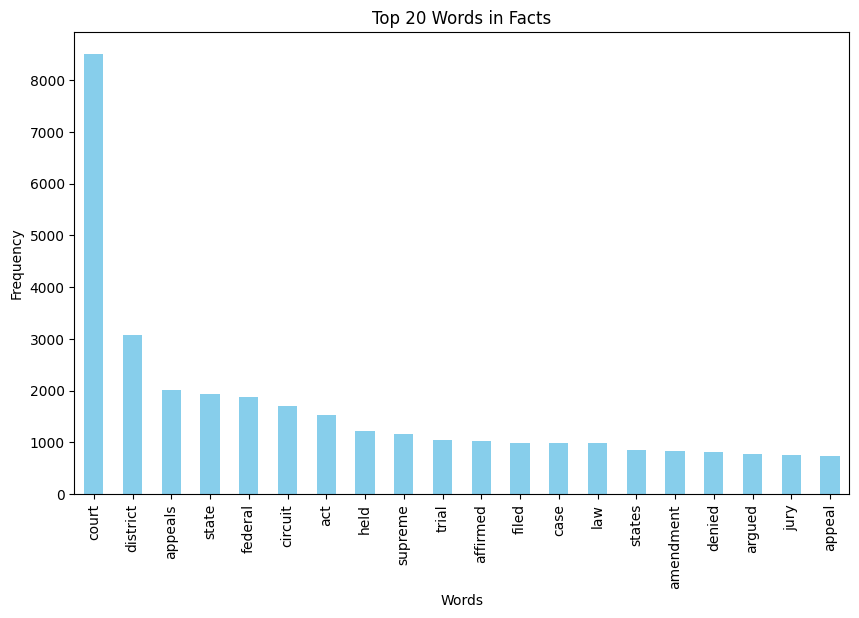

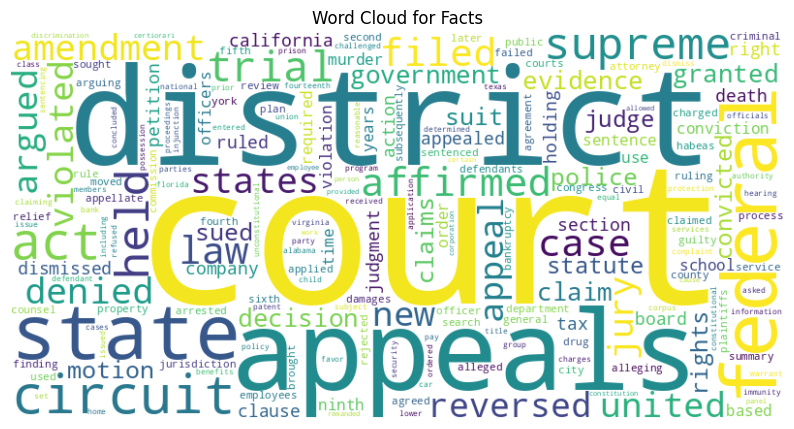

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')

# 텍스트 데이터 추출
facts_text = ' '.join(train['facts'].values)

# 불용어(stopwords) 설정
stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS

# 단어 토큰화
tokens = word_tokenize(facts_text)

# 불용어 제거
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

# 단어 빈도수 계산
word_freq = pd.Series(filtered_tokens).value_counts()

# 상위 20개 단어 시각화
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Facts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Facts')
plt.show()


### fact 판결 0, 1일 때 나누어서 시각

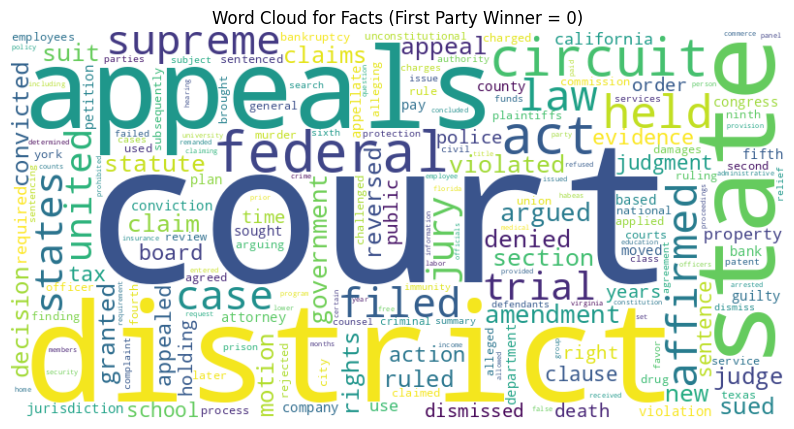

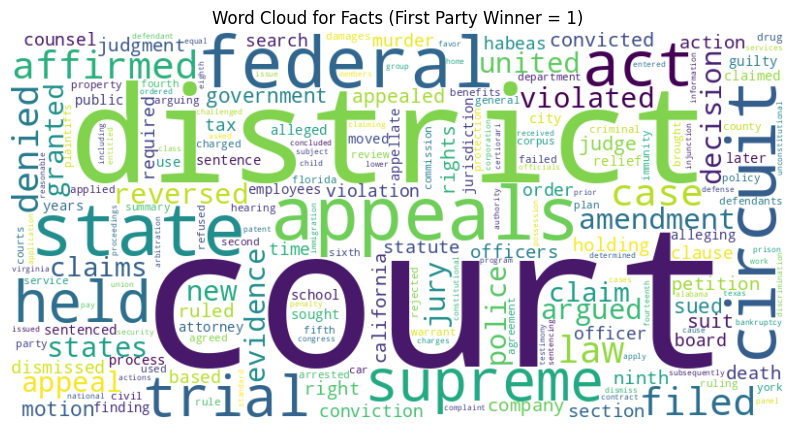

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')

# 판결이 0인 경우와 1인 경우로 데이터 나누기
facts_0 = train[train['first_party_winner'] == 0]['facts']
facts_1 = train[train['first_party_winner'] == 1]['facts']

# 불용어(stopwords) 설정
stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS

# 함수: 텍스트 데이터 전처리 및 시각화
def visualize_wordcloud(facts, title):
    # 텍스트 데이터 추출
    facts_text = ' '.join(facts.values)

    # 단어 토큰화
    tokens = word_tokenize(facts_text)

    # 불용어 제거
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # 단어 빈도수 계산
    word_freq = pd.Series(filtered_tokens).value_counts()

    # 워드클라우드 시각화
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Facts ({title})')
    plt.show()

# 시각화: 판결이 0일 때의 Word Cloud
visualize_wordcloud(facts_0, 'First Party Winner = 0')

# 시각화: 판결이 1일 때의 Word Cloud
visualize_wordcloud(facts_1, 'First Party Winner = 1')


### 0과 1일 때 히스토그램 워드클라우드

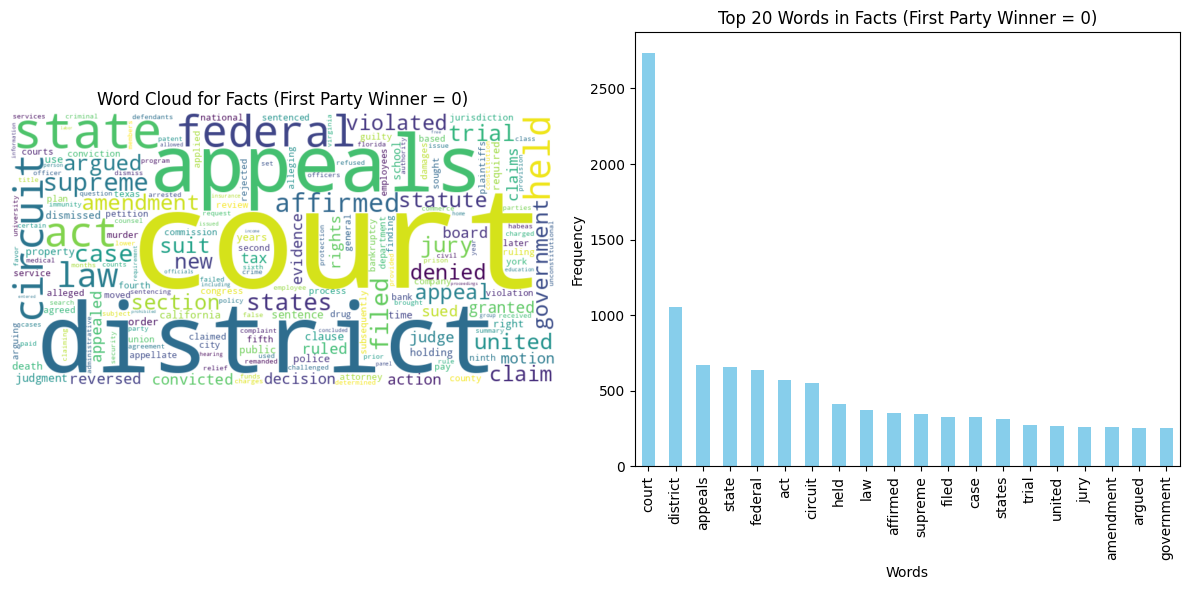

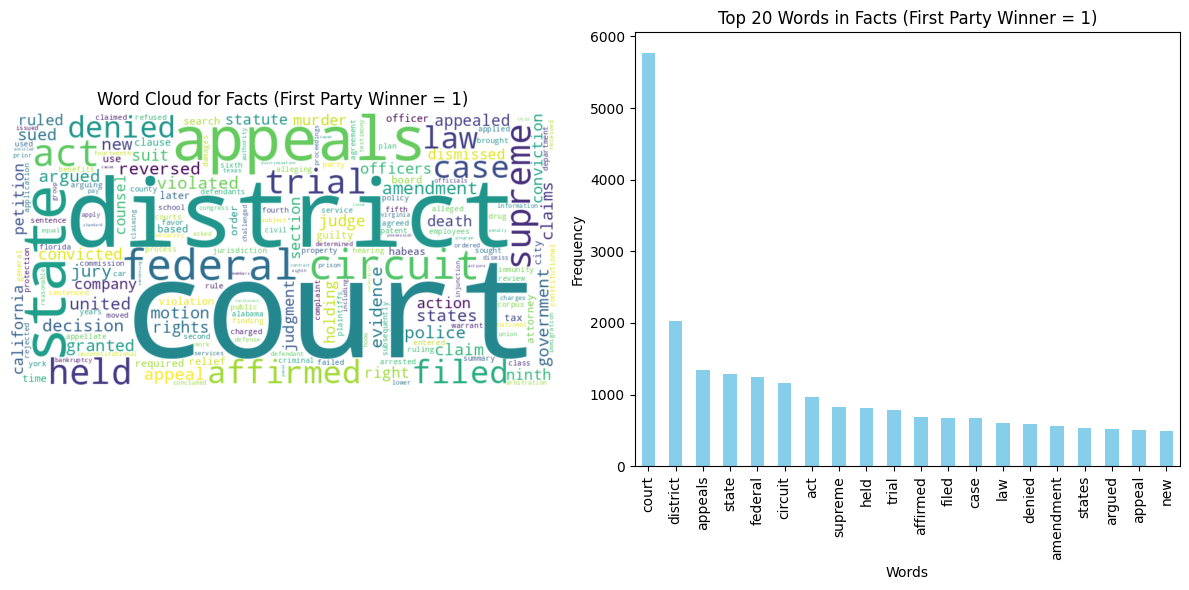

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')

# 판결이 0인 경우와 1인 경우로 데이터 나누기
facts_0 = train[train['first_party_winner'] == 0]['facts']
facts_1 = train[train['first_party_winner'] == 1]['facts']

# 불용어(stopwords) 설정
stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS

# 함수: 텍스트 데이터 전처리 및 시각화
def visualize_wordcloud(facts, title):
    # 텍스트 데이터 추출
    facts_text = ' '.join(facts.values)

    # 단어 토큰화
    tokens = word_tokenize(facts_text)

    # 불용어 제거
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # 단어 빈도수 계산
    word_freq = pd.Series(filtered_tokens).value_counts()

    # 워드클라우드 시각화
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Facts ({title})')

    # 단어 빈도수 히스토그램
    plt.subplot(1, 2, 2)
    word_freq.head(20).plot(kind='bar', color='skyblue')
    plt.title(f'Top 20 Words in Facts ({title})')
    plt.xlabel('Words')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# 시각화: 판결이 0일 때의 Word Cloud와 단어 빈도수 히스토그램
visualize_wordcloud(facts_0, 'First Party Winner = 0')

# 시각화: 판결이 1일 때의 Word Cloud와 단어 빈도수 히스토그램
visualize_wordcloud(facts_1, 'First Party Winner = 1')


### 공통어 제외 시각화

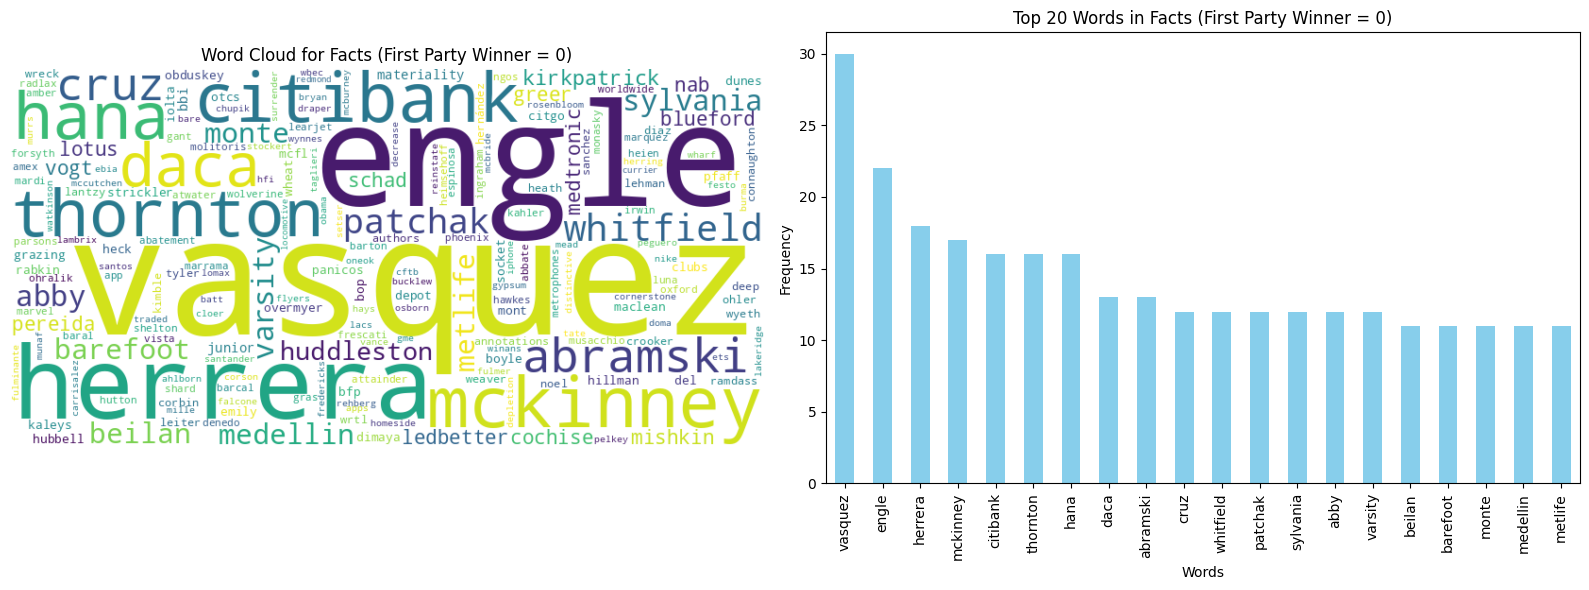

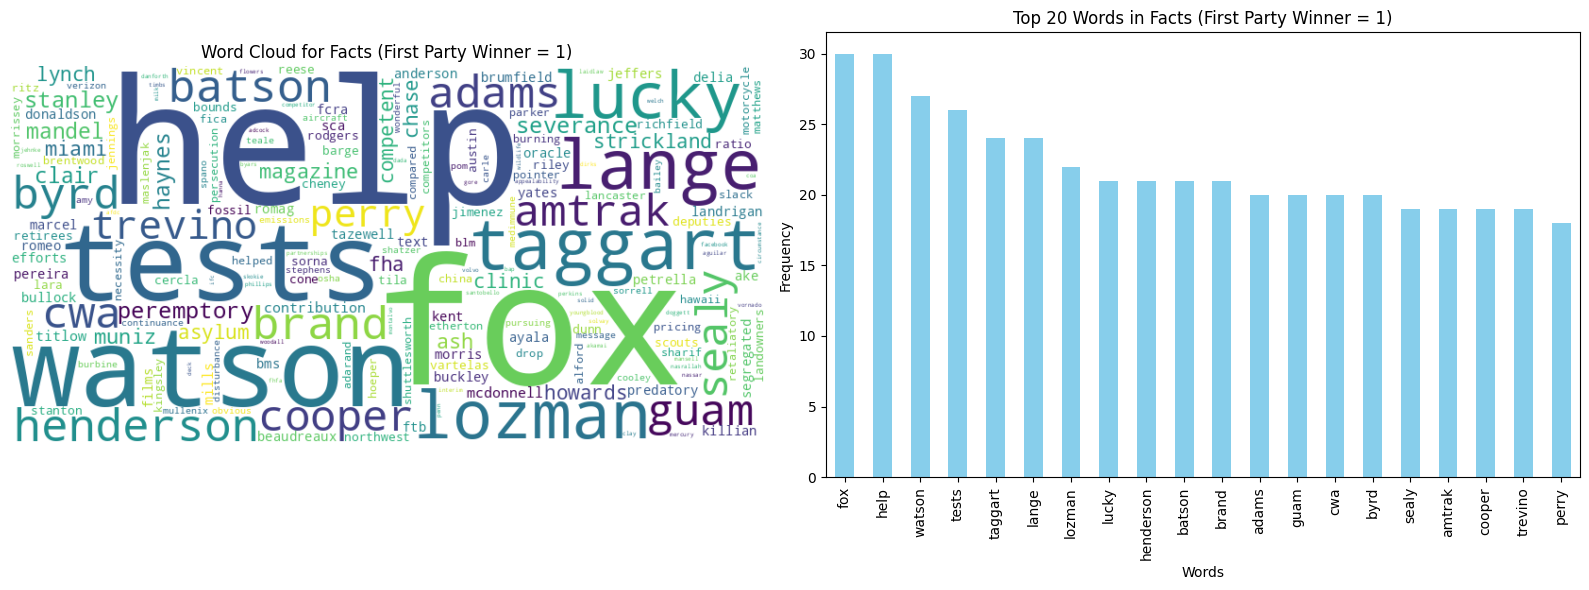

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')

# 판결이 0인 경우와 1인 경우로 데이터 나누기
facts_0 = train[train['first_party_winner'] == 0]['facts']
facts_1 = train[train['first_party_winner'] == 1]['facts']

# 불용어(stopwords) 설정
stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS

# 함수: 텍스트 데이터 전처리 및 시각화
def visualize_wordcloud(facts, title):
    # 텍스트 데이터 추출
    facts_text = ' '.join(facts.values)

    # 단어 토큰화
    tokens = word_tokenize(facts_text)

    # 불용어 제거
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # 단어 빈도수 계산
    word_freq = pd.Series(filtered_tokens).value_counts()

    return word_freq

# 판결이 0일 때의 최고 빈도수 단어 리스트
word_freq_0 = visualize_wordcloud(facts_0, 'First Party Winner = 0')

# 판결이 1일 때의 최고 빈도수 단어 리스트
word_freq_1 = visualize_wordcloud(facts_1, 'First Party Winner = 1')

# 두 리스트의 교집합 찾기
common_words = set(word_freq_0.index) & set(word_freq_1.index)

# 각 리스트에서 교집합에 해당하는 단어 제외
word_freq_0 = word_freq_0.drop(common_words)
word_freq_1 = word_freq_1.drop(common_words)

# 워드클라우드 및 히스토그램 시각화
plt.figure(figsize=(16, 6))

# 판결이 0일 때의 시각화
plt.subplot(1, 2, 1)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_0)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Facts (First Party Winner = 0)')

plt.subplot(1, 2, 2)
word_freq_0.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Facts (First Party Winner = 0)')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 판결이 1일 때의 시각화
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Facts (First Party Winner = 1)')

plt.subplot(1, 2, 2)
word_freq_1.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Facts (First Party Winner = 1)')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 시도2

## 필요 패키지 import

In [88]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

## 데이터 로드

In [89]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/skt/judgment/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/judgment/test.csv')

## 데이터 전처리

In [90]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train['facts'])
X_test_tfidf = vectorizer.transform(test['facts'])
Y_train = train["first_party_winner"]

# LSTM을 위한 텍스트 전처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['facts'])
X_train_seq = tokenizer.texts_to_sequences(train['facts'])
X_test_seq = tokenizer.texts_to_sequences(test['facts'])

# 시퀀스 패딩
max_sequence_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print(f'X_train_padded shape: {X_train_padded.shape}')
print(f'X_test_padded shape: {X_test_padded.shape}')

X_train_padded shape: (2478, 936)
X_test_padded shape: (1240, 936)


In [91]:
# 데이터 나누기
X_train_lstm, X_val_lstm, Y_train_lstm, Y_val_lstm = train_test_split(X_train_padded, Y_train, test_size=0.2, random_state=42)


## 모델 정의 및 학습

In [92]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dense(units=64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# LSTM 모델 학습
history = lstm_model.fit(X_train_lstm, Y_train_lstm, epochs=5, batch_size=32, validation_data=(X_val_lstm, Y_val_lstm))


Epoch 1/5
62/62 [==============================] - 11s 144ms/step - loss: 0.6459 - accuracy: 0.6655 - val_loss: 0.6412 - val_accuracy: 0.6613
Epoch 2/5
62/62 [==============================] - 6s 103ms/step - loss: 0.6362 - accuracy: 0.6665 - val_loss: 0.6457 - val_accuracy: 0.6613
Epoch 3/5
62/62 [==============================] - 7s 111ms/step - loss: 0.6412 - accuracy: 0.6665 - val_loss: 0.6416 - val_accuracy: 0.6613
Epoch 4/5
62/62 [==============================] - 6s 93ms/step - loss: 0.6375 - accuracy: 0.6670 - val_loss: 0.6405 - val_accuracy: 0.6613
Epoch 5/5
62/62 [==============================] - 4s 72ms/step - loss: 0.6387 - accuracy: 0.6670 - val_loss: 0.6408 - val_accuracy: 0.6613


## 모델 예측 및 csv 파일로 저장

In [93]:
## 모델 예측 및 평가

# LSTM 모델 예측
lstm_pred = lstm_model.predict(X_test_padded)
lstm_pred_binary = (lstm_pred > 0.5).astype(int)

# 결과를 submit DataFrame에 추가
submit['first_party_winner'] = lstm_pred_binary

# 결과 저장
submit.to_csv('./lstm_submit.csv', index=False)


39/39 [==============================] - 1s 16ms/step


In [94]:
submit.head(10)

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1
5,TEST_0005,1
6,TEST_0006,1
7,TEST_0007,1
8,TEST_0008,1
9,TEST_0009,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['first_party_winner']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'first_party_winner'}, axis=1)
              .sort_values('first_party_winner', ascending=True))
  xs = counted['first_party_winner']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('first_party_winner', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('first_party_winner')
_ = plt.ylabel('count()')

In [95]:
unique_values = submit['first_party_winner'].head(10).unique()
unique_count = len(unique_values)

print(f"상위 10개 값: {unique_values}")
print(f"유니크한 값의 갯수: {unique_count}")

상위 10개 값: [1]
유니크한 값의 갯수: 1


In [97]:
## 성능 평가

# LSTM 모델 성능 평가
lstm_accuracy = accuracy_score(Y_val_lstm, (lstm_model.predict(X_val_lstm) > 0.5).astype(int))
print(f'LSTM Model Accuracy on Validation Set: {lstm_accuracy:.4f}')



16/16 [==============================] - 0s 29ms/step
LSTM Model Accuracy on Validation Set: 0.6613


## 예측 결과 시각화

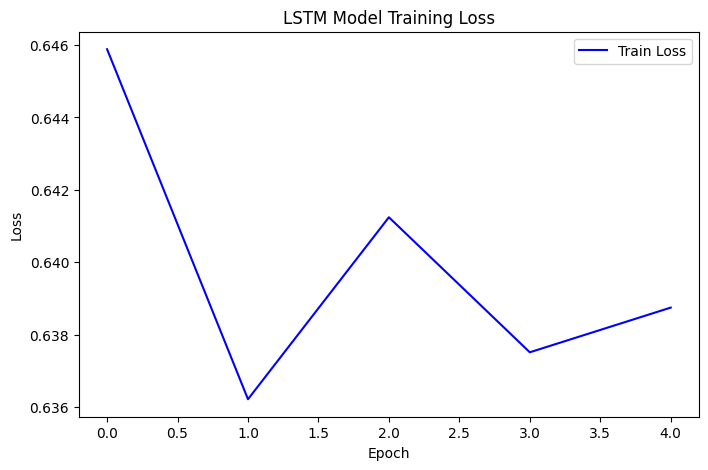

In [98]:
## 예측 결과 시각화

# LSTM 모델 학습 과정 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 합성데이터 기반 객체 탐지 AI 경진대회 - 대기시간 예측

https://dacon.io/competitions/official/236158/talkboard/409670?page=1&dtype=recent

## 필요 패키지 import

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## 데이터 읽어와서 확인하기

In [4]:
train = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv')
train.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


## 데이터 결측치 확인 및 처리

In [5]:
# Display basic information about the dataset
print("--------------info-------------------")
print(train.info())
print("-----------결측치 확인---------")
# Check for missing values
print(train.isnull().sum())
print("----------사이즈 확인-----------")
# 사이즈 확인
print(train.shape)

--------------info-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391939 entries, 0 to 391938
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           391939 non-null  object 
 1   ARI_CO              391939 non-null  object 
 2   ARI_PO              391939 non-null  object 
 3   SHIP_TYPE_CATEGORY  391939 non-null  object 
 4   DIST                391939 non-null  float64
 5   ATA                 391939 non-null  object 
 6   ID                  391939 non-null  object 
 7   BREADTH             391938 non-null  float64
 8   BUILT               391939 non-null  int64  
 9   DEADWEIGHT          391939 non-null  int64  
 10  DEPTH               391938 non-null  float64
 11  DRAUGHT             391938 non-null  float64
 12  GT                  391939 non-null  int64  
 13  LENGTH              391938 non-null  float64
 14  SHIPMANAGER         391939 non-null  object 
 

In [6]:
train.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
count,391939.000000,391938.00000,391939.000000,391939.000000,391938.000000,391938.000000,391939.000000,391938.000000,228251.000000,228251.000000,227309.000000,228251.000000,391939.000000,391939.000000,391939.000000
mean,19.328187,30.55001,14.747989,63577.506780,16.476177,11.088106,41348.968666,205.121320,-0.294910,-0.263849,18.862968,2.706992,11.841580,0.000876,61.940835
std,30.930059,10.95707,7.043988,63515.531024,6.045930,4.599298,39304.543664,75.873891,3.366585,3.736949,9.729976,1.388026,6.644114,0.000838,170.809558
min,0.000000,10.00000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,0.000005,0.000000
25%,0.000000,20.00000,10.000000,14300.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.805246,7.000000,0.000142,0.000000
50%,6.929678,30.00000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,0.000552,7.944444
75%,25.692827,40.00000,18.000000,81500.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556236,17.000000,0.001614,49.176111
max,199.980651,60.00000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,0.002615,2159.130556


In [7]:
# 결측치 처
# 'V_WIND', 'U_WIND', 'AIR_TEMPERATURE' 칼럼 제거
train = train.drop(['V_WIND', 'U_WIND', 'AIR_TEMPERATURE'], axis=1)

# 나머지 결측치가 포함된 행 제거
train = train.dropna()

## 이상치 확인 및 처리


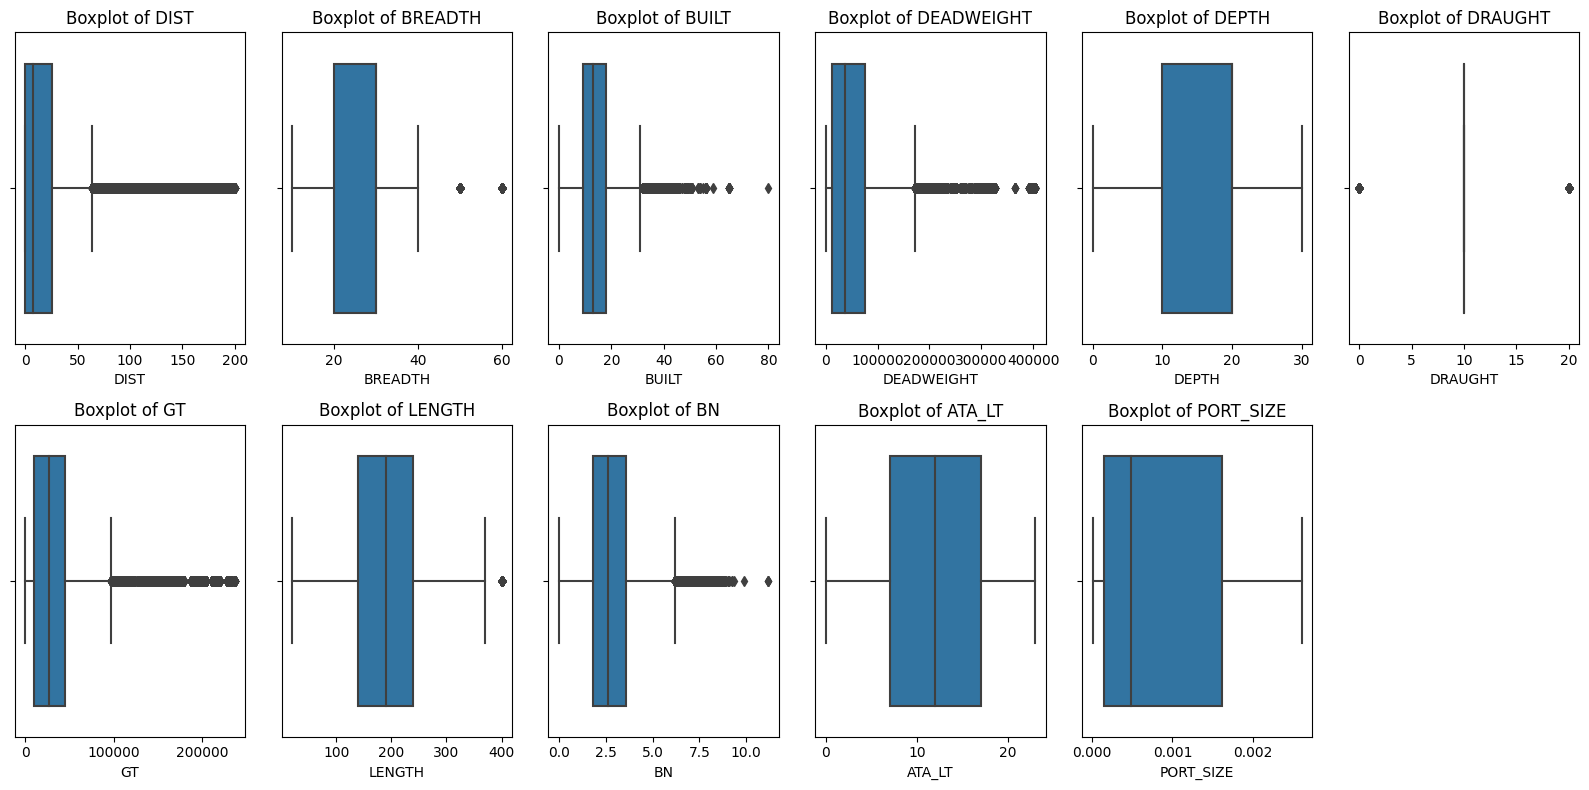

In [8]:
# 수치형 변수 선택
numerical_cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'BN', 'ATA_LT', 'PORT_SIZE']

# 이상치를 확인할 변수들에 대한 상자 그림 생성
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [9]:
# 이상치 처리
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-9-4a0d9e9d34ef>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train.quantile(0.25)
<ipython-input-9-4a0d9e9d34ef>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train.quantile(0.75)
<ipython-input-9-4a0d9e9d34ef>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


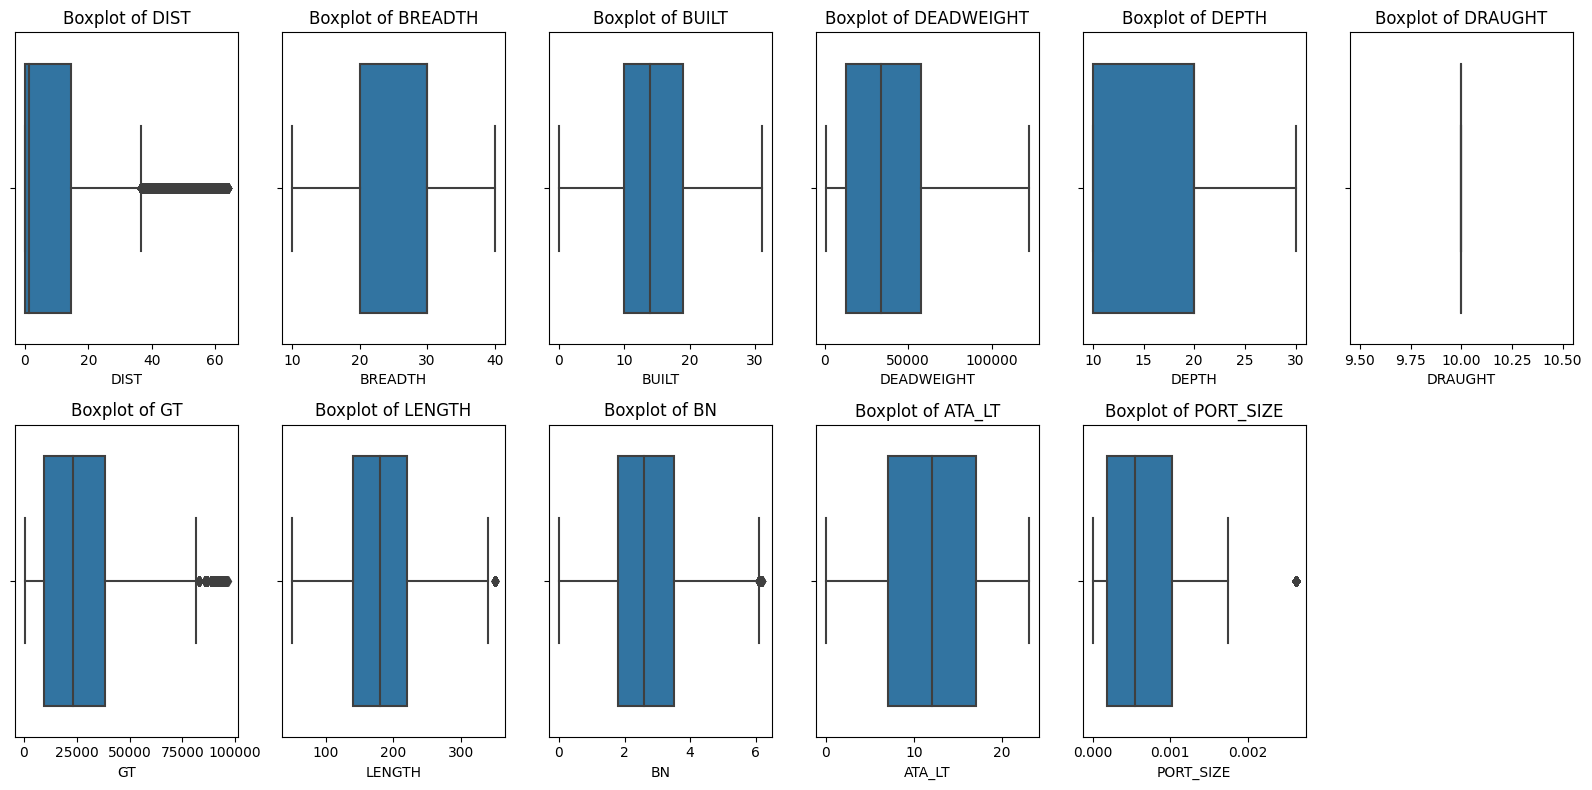

In [10]:
# 수치형 변수 선택
numerical_cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'BN', 'ATA_LT', 'PORT_SIZE']

# 이상치를 확인할 변수들에 대한 상자 그림 생성
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## 범주형 - 원핫 인코딩

In [11]:
# 범주형 변수를 원핫 인코딩으로 변환
train = pd.get_dummies(train, columns=['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'SHIPMANAGER', 'FLAG'])


## 수치형 StandardScaler

In [13]:
# 수치형 변수 선택
numerical_cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'BN', 'ATA_LT', 'PORT_SIZE']
# StandardScaler 적용
scaler = StandardScaler()
train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))


In [15]:
train.shape

(135330, 5120)

## 상관계수 계산 및 특성 선택 - 시간 오래 걸림 원핫인코딩 해둬서

In [1]:
# 상관계수 행렬 계산
correlation_matrix = train.corr()

# 'CI_HOUR'와의 상관계수의 절댓값을 기준으로 내림차순 정렬
correlation_with_target = correlation_matrix['CI_HOUR'].abs().sort_values(ascending=False)

# 상위 5개 변수 선택
top_features = correlation_with_target[1:6].index

# 선택된 변수 출력
print("상위 5개 변수:")
print(top_features)


NameError: ignored

In [ ]:


# 데이터를 특성(X) 및 타겟 변수(y)로 분할
X = train_selected.drop('CI_HOUR', axis=1)
y = train_selected['CI_HOUR']

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 예측 vs 실제 값 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('실제 CI_HOUR')
plt.ylabel('예측 CI_HOUR')
plt.title('실제 vs 예측 CI_HOUR')
plt.show()


<ipython-input-8-10918ecc07ba>:23: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = train.quantile(0.25)
<ipython-input-8-10918ecc07ba>:24: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = train.quantile(0.75)
<ipython-input-8-10918ecc07ba>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-8-10918ecc07ba>:37: FutureWarning: The default value of numeric_only in DataF

# 다시

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# 데이터 읽기
train = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv')


In [8]:
# 'V_WIND', 'U_WIND', 'AIR_TEMPERATURE' 칼럼 제거
train = train.drop(['V_WIND', 'U_WIND', 'AIR_TEMPERATURE'], axis=1)
test = test.drop(['V_WIND', 'U_WIND', 'AIR_TEMPERATURE'], axis=1)

# 나머지 결측치가 포함된 행 제거
train = train.dropna()

In [9]:
# 이상치 처리 (IQR 기반)
numerical_cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'BN', 'ATA_LT', 'PORT_SIZE']
Q1 = train[numerical_cols].quantile(0.25)
Q3 = train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train[numerical_cols] < (Q1 - 1.5 * IQR)) | (train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
# 라벨 인코딩
label_encoder = LabelEncoder()
categorical_cols = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'SHIPMANAGER', 'FLAG']
for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])


ValueError: ignored

In [ ]:
# 수치형 변수에 StandardScaler 적용
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])


In [ ]:

# 상관관계 히트맵 그리기
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

In [ ]:
# 'CI_HOUR'와 상관관계가 높은 상위 5개 변수 선택
top_features = correlation_matrix['CI_HOUR'].abs().nlargest(6).index
top_features = top_features[1:]  # 'CI_HOUR' 자체는 제외
train_selected = train[top_features]


In [ ]:
# 데이터를 특성(X) 및 타겟 변수(y)로 분할
X = train.drop(['CI_HOUR', 'SAMPLE_ID', 'ATA'], axis=1)  # CI_HOUR, SAMPLE_ID, ATA 제외
y = train['CI_HOUR']

In [ ]:
# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# RandomForestRegressor 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
# 예측 vs 실제 값 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('실제 CI_HOUR')
plt.ylabel('예측 CI_HOUR')
plt.title('실제 vs 예측 CI_HOUR')
plt.show()

In [ ]:
# test 데이터로 예측
test_selected = test.drop(['SAMPLE_ID', 'ATA'], axis=1)  # SAMPLE_ID, ATA 제외
test_pred = model.predict(test_selected)

# 예측 결과 확인
result_df = pd.DataFrame({'SAMPLE_ID': test['SAMPLE_ID'], 'Predicted_CI_HOUR': test_pred})
print(result_df)

# 아

<ipython-input-25-ed925f44841f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
<ipython-input-25-ed925f44841f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[numerical_cols] = scaler.transform(test[numerical_cols])
<ipython-input-25-ed925f44841f>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of num

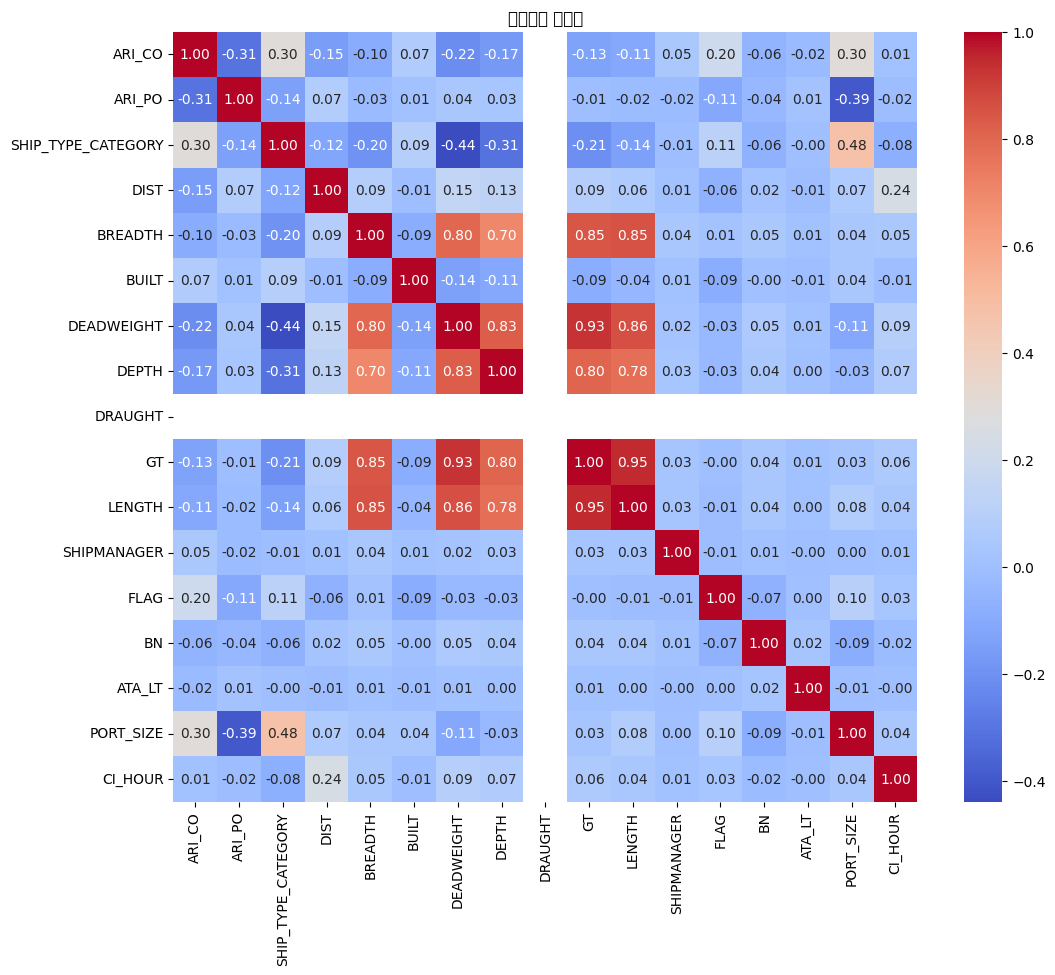

            CI_HOUR      DIST  DEADWEIGHT  SHIP_TYPE_CATEGORY     DEPTH  \
0          0.000000 -0.755664   -1.151967                   2 -1.062246   
1          0.000000 -0.755664    0.264745                   1  0.937752   
2          2.721944  0.538126   -0.149310                   0  0.937752   
3          7.374722  0.815571    1.114272                   0  0.937752   
4          0.000000 -0.755664   -0.913171                   1 -1.062246   
...             ...       ...         ...                 ...       ...   
150621    14.551111  3.496055   -0.948866                   2 -1.062246   
150622    81.266944  2.637556    1.881703                   0  0.937752   
150623    23.914444 -0.231311    0.446787                   2  0.937752   
150624  1095.597222 -0.063080    1.064300                   0  0.937752   
150625   144.061389 -0.333223   -1.285821                   0 -1.062246   

              GT  
0      -1.127030  
1       0.203320  
2      -0.194695  
3       1.555478  
4   

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 읽기
train = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv')
test = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv')

# 'V_WIND', 'U_WIND', 'AIR_TEMPERATURE' 칼럼 제거
train = train.drop(['V_WIND', 'U_WIND', 'AIR_TEMPERATURE'], axis=1)
test = test.drop(['V_WIND', 'U_WIND', 'AIR_TEMPERATURE'], axis=1)

# 나머지 결측치가 포함된 행 제거
train = train.dropna()

# 이상치 처리 (IQR 기반)
numerical_cols = ['DIST', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'BN', 'ATA_LT', 'PORT_SIZE']
Q1 = train[numerical_cols].quantile(0.25)
Q3 = train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
train = train[~((train[numerical_cols] < (Q1 - 1.5 * IQR)) | (train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 라벨 인코딩을 위해 합쳐서 변환 후 다시 분리
combined_data = pd.concat([train, test], ignore_index=True)

# 라벨 인코딩
label_encoder = LabelEncoder()
categorical_cols = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'SHIPMANAGER', 'FLAG']
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# 학습 데이터와 테스트 데이터로 다시 분리
train = combined_data[:len(train)]
test = combined_data[len(train):]

# 수치형 변수에 StandardScaler 적용
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 상관관계 히트맵 그리기
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

# 'CI_HOUR'와 상관관계가 높은 상위 5개 변수 선택
top_features = correlation_matrix['CI_HOUR'].abs().nlargest(6).index
top_features = top_features[:]  # 'CI_HOUR' 자체는 제외인데 이후 잘라냄
train_selected = train[top_features]

print(train_selected)

In [26]:
train_selected.head()

,CI_HOUR,DIST,DEADWEIGHT,SHIP_TYPE_CATEGORY,DEPTH,GT
0,0.000000,-0.755664,-1.151967,2,-1.062246,-1.127030
1,0.000000,-0.755664,0.264745,1,0.937752,0.203320
2,2.721944,0.538126,-0.149310,0,0.937752,-0.194695
3,7.374722,0.815571,1.114272,0,0.937752,1.555478
4,0.000000,-0.755664,-0.913171,1,-1.062246,-0.925842


In [27]:

# 데이터를 특성(X) 및 타겟 변수(y)로 분할
y = train_selected['CI_HOUR']
X = train_selected.drop('CI_HOUR', axis=1)



Mean Squared Error: 23929.002892490887
Mean Absolute Error: 58.0358958671425


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


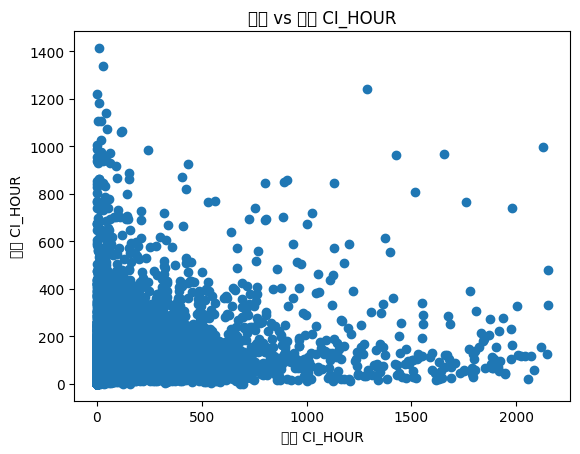

          SAMPLE_ID  Predicted_CI_HOUR
150626  TEST_000000         304.921633
150627  TEST_000001          41.714672
150628  TEST_000002         578.667483
150629  TEST_000003          55.866894
150630  TEST_000004           0.000000
...             ...                ...
371112  TEST_220486         779.766722
371113  TEST_220487         195.050506
371114  TEST_220488          30.733778
371115  TEST_220489           0.000000
371116  TEST_220490          70.895564

[220491 rows x 2 columns]


In [28]:

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # MAE 계산 추가
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')  # 출력에 MAE 추가

# 예측 vs 실제 값 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('실제 CI_HOUR')
plt.ylabel('예측 CI_HOUR')
plt.title('실제 vs 예측 CI_HOUR')
plt.show()

# test 데이터로 예측
test_selected = test[top_features.drop('CI_HOUR')]  # 'CI_HOUR' 자체는 테스트 데이터에 없음
test_pred = model.predict(test_selected)

# 예측 결과 확인
result_df = pd.DataFrame({'SAMPLE_ID': test['SAMPLE_ID'], 'Predicted_CI_HOUR': test_pred})
print(result_df)


# 다시

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Encoding features: 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]


Model Tune for LGBM.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 391939, number of used features: 26
[LightGBM] [Info] Start training from score 61.940835


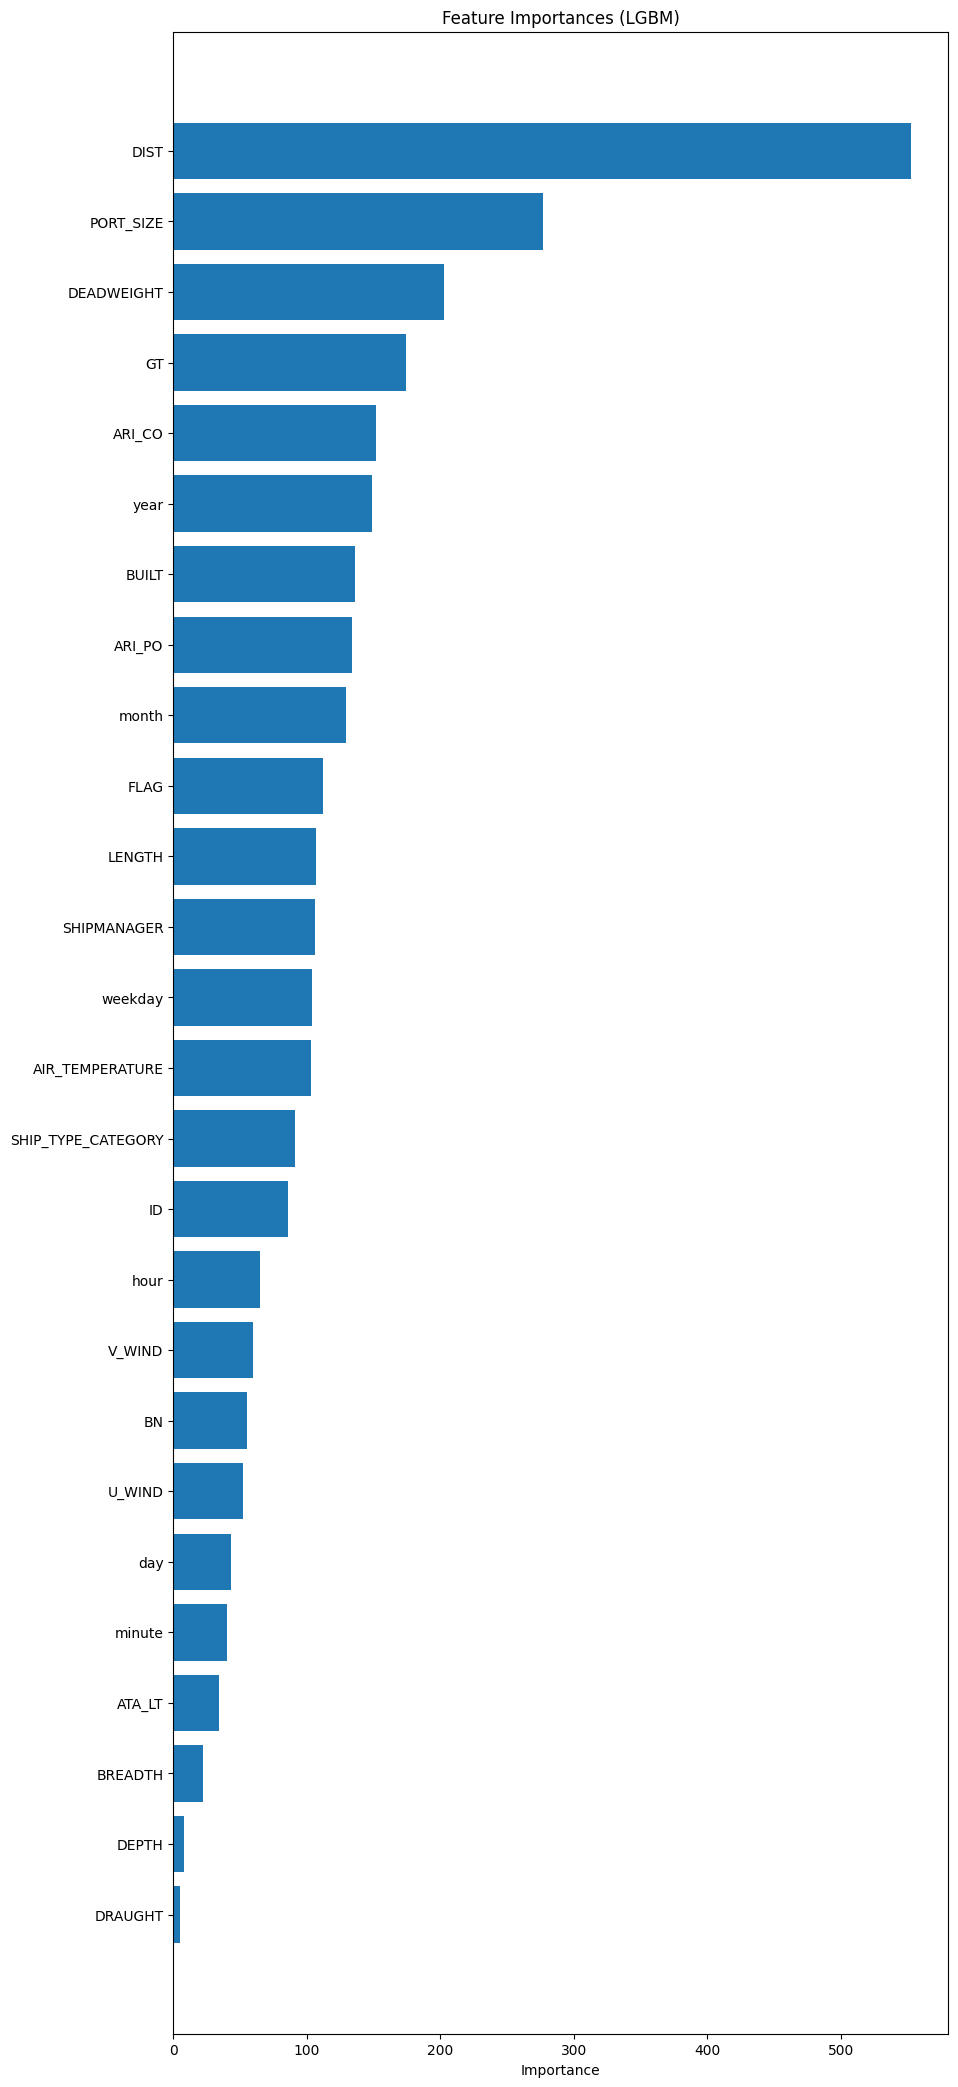

Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1995
[LightGBM] [Info] Number of data points in the train set: 313551, number of used features: 16
[LightGBM] [Info] Start training from score 62.157481


Processing folds:  20%|██        | 1/5 [00:03<00:15,  3.88s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1997
[LightGBM] [Info] Number of data points in the train set: 313551, number of used features: 16
[LightGBM] [Info] Start training from score 61.815772


Processing folds:  40%|████      | 2/5 [00:08<00:12,  4.12s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1995
[LightGBM] [Info] Number of data points in the train set: 313551, number of used features: 16
[LightGBM] [Info] Start training from score 61.753606


Processing folds:  60%|██████    | 3/5 [00:13<00:08,  4.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 313551, number of used features: 16
[LightGBM] [Info] Start training from score 61.959403


Processing folds:  80%|████████  | 4/5 [00:16<00:04,  4.16s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 313552, number of used features: 16
[LightGBM] [Info] Start training from score 62.017911


Processing folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


Validation : MAE scores for each fold: [54.86773917888979, 56.495100351706654, 56.18117132674082, 55.47129766119499, 55.31992295370341]
Validation : MAE: 55.66704629444714


In [24]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import bisect
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

train = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv').drop(columns=['SAMPLE_ID'])

## Data Pre-processing

# datetime 컬럼 처리
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# datetime 컬럼 제거
train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)

# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

# 결측치 처리
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

## 모델 학습 및 특성 중요도 확인

def train_and_evaluate(model, model_name, X_train, y_train):
    print(f'Model Tune for {model_name}.')
    model.fit(X_train, y_train)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(X_train.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

X_train = train.drop(columns='CI_HOUR')
y_train = train['CI_HOUR']

# Model Tune for LGBM
lgbm_model, lgbm_feature_importances = train_and_evaluate(lgb.LGBMRegressor(), 'LGBM', X_train, y_train)

## 특성 중요도로부터 Feature Selection

threshold = 85 # Your Threshold
low_importance_features = X_train.columns[lgbm_feature_importances < threshold]

X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = test.drop(columns=low_importance_features)

## K-Fold Model Fitting & Validation

lgbm = lgb.LGBMRegressor()

# 5-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 각 fold의 모델로부터의 예측을 저장할 리스트와 MAE 점수 리스트
ensemble_predictions = []
scores = []

for train_idx, val_idx in tqdm(kf.split(X_train_reduced), total=5, desc="Processing folds"):
    X_t, X_val = X_train_reduced.iloc[train_idx], X_train_reduced.iloc[val_idx]
    y_t, y_val = y_train[train_idx], y_train[val_idx]

    # 두 모델 모두 학습
    lgbm.fit(X_t, y_t)

    # 각 모델로부터 Validation set에 대한 예측을 평균내어 앙상블 예측 생성
    val_pred = lgbm.predict(X_val)

    # Validation set에 대한 대회 평가 산식 계산 후 저장
    scores.append(mean_absolute_error(y_val, val_pred))

    # test 데이터셋에 대한 예측 수행 후 저장
    lgbm_pred = lgbm.predict(X_test_reduced)
    lgbm_pred = np.where(lgbm_pred < 0, 0, lgbm_pred)

    ensemble_predictions.append(lgbm_pred)

# K-fold 모든 예측의 평균을 계산하여 fold별 모델들의 앙상블 예측 생성
final_predictions = np.mean(ensemble_predictions, axis=0)

# 각 fold에서의 Validation Metric Score와 전체 평균 Validation Metric Score출력
print("Validation : MAE scores for each fold:", scores)
print("Validation : MAE:", np.mean(scores))

## Submission

submit = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/sample_submission.csv')
submit['CI_HOUR'] = final_predictions
submit.to_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/baseline_submit.csv', index=False)

# 딥러닝으로 해보기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import bisect
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv').drop(columns=['SAMPLE_ID'])


Mounted at /content/drive


In [2]:

# datetime 컬럼 처리
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# datetime 컬럼 제거
train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)


In [3]:

# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

# 결측치 처리
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)


Encoding features: 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]


Model Tune for LGBM.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 391939, number of used features: 26
[LightGBM] [Info] Start training from score 61.940835


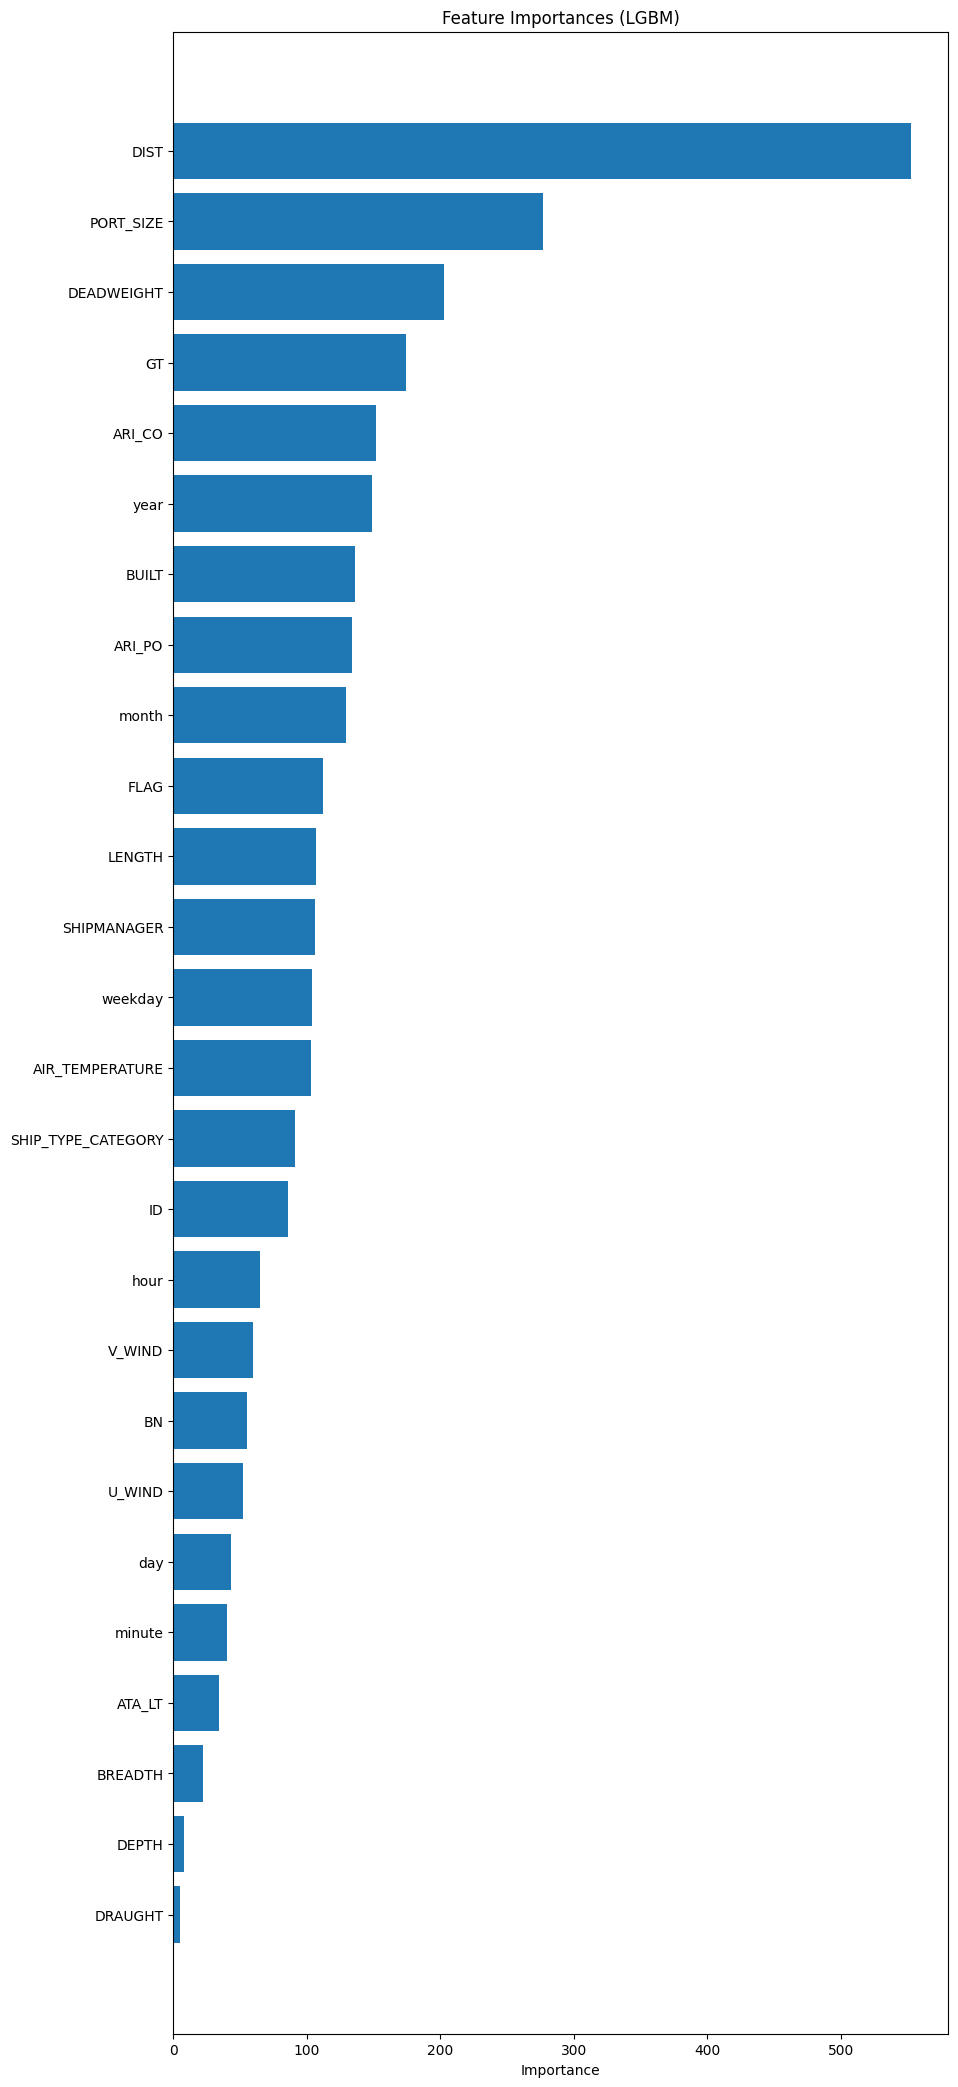

In [4]:

## 모델 학습 및 특성 중요도 확인

def train_and_evaluate(model, model_name, X_train, y_train):
    print(f'Model Tune for {model_name}.')
    model.fit(X_train, y_train)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(X_train.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

X_train = train.drop(columns='CI_HOUR')
y_train = train['CI_HOUR']

# Model Tune for LGBM
lgbm_model, lgbm_feature_importances = train_and_evaluate(lgb.LGBMRegressor(), 'LGBM', X_train, y_train)

## 특성 중요도로부터 Feature Selection

threshold = 85 # Your Threshold
low_importance_features = X_train.columns[lgbm_feature_importances < threshold]

X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = test.drop(columns=low_importance_features)


In [5]:

## 신경망 모델 학습 및 특성 중요도 확인

# Define a neural network model
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(lr=0.001)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    return model


In [6]:

# Train and evaluate the neural network
nn_model = create_nn_model(X_train_reduced.shape[1])

# Model Tune for Neural Network
nn_model.fit(X_train_reduced, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/5
9799/9799 - 35s - loss: 140.2644 - val_loss: 62.0109 - 35s/epoch - 4ms/step
Epoch 2/5
9799/9799 - 31s - loss: 61.1036 - val_loss: 61.9253 - 31s/epoch - 3ms/step
Epoch 3/5
9799/9799 - 31s - loss: 61.0393 - val_loss: 61.9180 - 31s/epoch - 3ms/step
Epoch 4/5
9799/9799 - 32s - loss: 61.0308 - val_loss: 61.9172 - 32s/epoch - 3ms/step
Epoch 5/5
9799/9799 - 34s - loss: 61.0347 - val_loss: 61.9171 - 34s/epoch - 3ms/step


In [7]:

# Evaluate the neural network
nn_predictions = nn_model.predict(X_train_reduced)
nn_mae = mean_absolute_error(y_train, nn_predictions)

# Print the neural network MAE
print(f"Neural Network MAE: {nn_mae}")


12249/12249 [==============================] - 19s 2ms/step
Neural Network MAE: 61.202889847670065


In [8]:

# Feature importance for neural network
nn_feature_importances = nn_model.layers[0].get_weights()[0]
nn_sorted_idx = np.argsort(np.abs(nn_feature_importances))


In [12]:
# 데이터 확인
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# 특성 중요도 확인
print("X_train_reduced Shape:", X_train_reduced.shape)
print("X_test_reduced Shape:", X_test_reduced.shape)

# 인덱스 확인
print("Train Index:", train.index)
print("X_train_reduced Index:", X_train_reduced.index)


Train Shape: (391939, 27)
Test Shape: (220491, 26)
X_train_reduced Shape: (391939, 16)
X_test_reduced Shape: (220491, 16)
Train Index: RangeIndex(start=0, stop=391939, step=1)
X_train_reduced Index: RangeIndex(start=0, stop=391939, step=1)


In [15]:

## 신경망 모델 학습 및 특성 중요도 확인

# Define a neural network model
def create_nn_model2(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu', input_dim=input_dim))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(lr=0.001)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    return model


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:

# Train and evaluate the neural network
nn_model = create_nn_model2(X_train_reduced.shape[1])

# Model Tune for Neural Network
nn_model.fit(X_train_reduced, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the neural network
nn_predictions = nn_model.predict(X_train_reduced)

# Calculate MAE and MSE
nn_mae = mean_absolute_error(y_train, nn_predictions)
nn_mse = mean_squared_error(y_train, nn_predictions)

# Print the neural network MAE and MSE
print(f"Neural Network MAE: {nn_mae}")
print(f"Neural Network MSE: {nn_mse}")

# Feature importance for neural network
nn_feature_importances = nn_model.layers[0].get_weights()[0]
nn_sorted_idx = np.argsort(np.abs(nn_feature_importances))

Epoch 1/5
9799/9799 - 39s - loss: 64.4872 - val_loss: 62.0102 - 39s/epoch - 4ms/step
Epoch 2/5
9799/9799 - 37s - loss: 61.0599 - val_loss: 61.9255 - 37s/epoch - 4ms/step
Epoch 3/5
9799/9799 - 35s - loss: 61.0279 - val_loss: 61.9179 - 35s/epoch - 4ms/step
Epoch 4/5
9799/9799 - 33s - loss: 61.0247 - val_loss: 61.9172 - 33s/epoch - 3ms/step
Epoch 5/5
9799/9799 - 36s - loss: 61.0244 - val_loss: 61.9172 - 36s/epoch - 4ms/step
12249/12249 [==============================] - 21s 2ms/step
Neural Network MAE: 61.20289861035332
Neural Network MSE: 32094.718622470475


In [23]:
# Neural Network 모델로 Test 데이터에 대한 예측
nn_predictions_test = nn_model.predict(X_test_reduced)
nn_predictions_test = np.squeeze(nn_predictions_test)
nn_predictions_test = np.where(nn_predictions_test < 0, 0, nn_predictions_test)


6891/6891 [==============================] - 19s 3ms/step


# 지안

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import bisect
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

train = pd.read_csv('train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('test.csv').drop(columns=['SAMPLE_ID'])

In [ ]:
train.head()

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,10.0,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,10.0,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,30.0,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,10.0,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,20.0,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


In [ ]:
train.isnull().sum()

ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                163688
V_WIND                163688
AIR_TEMPERATURE       164630
BN                    163688
ATA_LT                     0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [ ]:
# datetime 컬럼 처리
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# datetime 컬럼 제거
train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)

# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

# 결측치 처리
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

Encoding features: 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]


Model Tune for XGBoost.


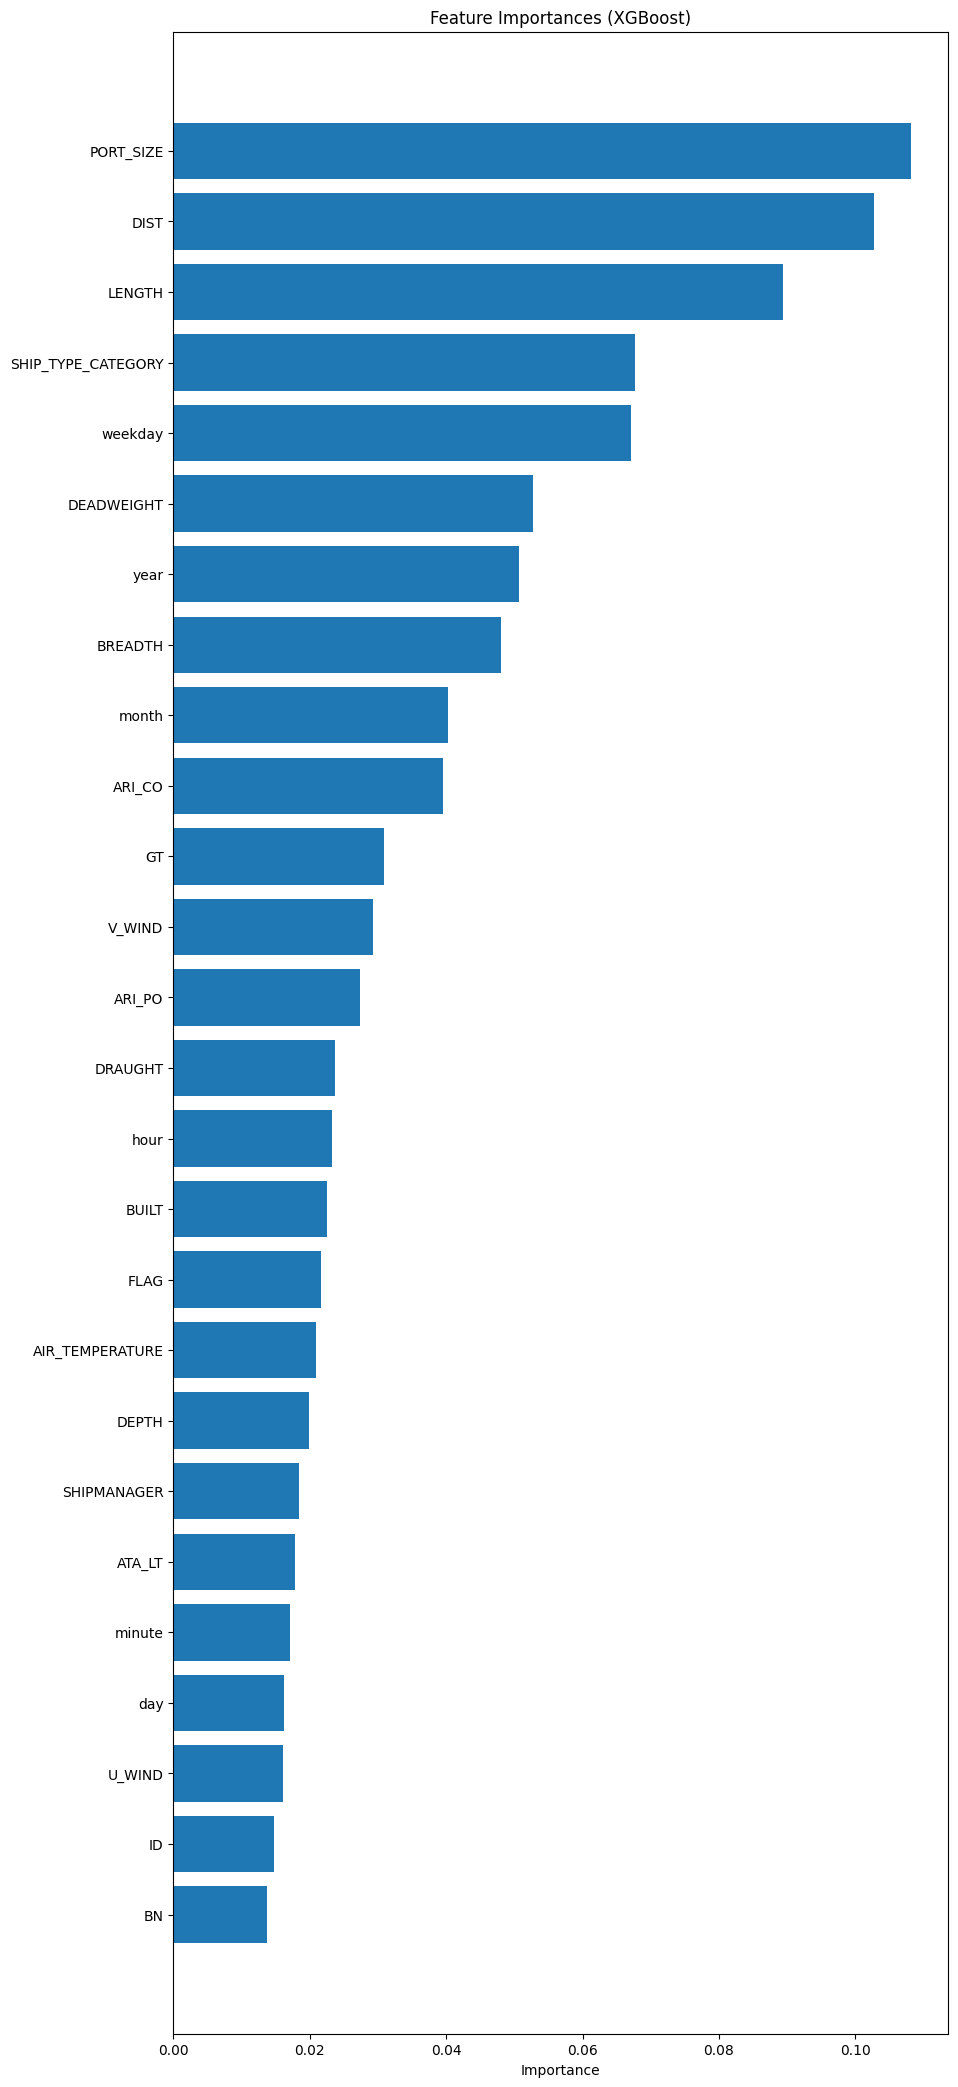

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

def train_and_evaluate(model, model_name, X_train, y_train):
    print(f'Model Tune for {model_name}.')
    model.fit(X_train, y_train)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(X_train.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

# XGBoost 모델을 사용하여 함수 실행
xgb_model = xgb.XGBRegressor()  # XGBoost 회귀 모델 생성
X = train.drop(columns='CI_HOUR')
y = train['CI_HOUR']
xgb_model, xgb_feature_importances = train_and_evaluate(xgb_model, 'XGBoost', X, y)


In [ ]:
threshold = 0.02  # 여러분의 임계값

# 낮은 중요도를 가진 피쳐들을 식별
low_importance_features = X.columns[xgb_feature_importances < threshold]

# 낮은 중요도를 가진 피쳐들을 학습 및 테스트 데이터에서 제거
X_reduced = X.drop(columns=low_importance_features)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_reduced, y)

# 테스트 데이터셋을 사용하여 예측
y_pred = xgb_model.predict(X_reduced)

# 예측 결과 평가 (예를 들어 평균 제곱 오차(MSE)를 사용)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"평균 제곱 오차(MSE): {mse}")
print(f"평균 제곱 오차(MAE): {mae}")

평균 제곱 오차(MSE): 17305.475525585993
평균 제곱 오차(MAE): 52.911240180656485


# 현성

In [25]:
!pip install optuna category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.8 MB/s eta 0:00:00


In [26]:
#Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder,OrdinalEncoder, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.inspection import PartialDependenceDisplay
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import optuna

# 1. 데이터

In [27]:
train = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv")
test = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/sample_submission.csv")

## 1) 시계열 데이터(ATA) 열 분리

In [28]:
import datetime

def transform_time(df):
    #I made these variables.
    df['ATA'] = pd.to_datetime(df['ATA'])
    df['YEAR'] = df['ATA'].dt.year
    df['MONTH'] = df['ATA'].dt.month
    df['DAY'] = df['ATA'].dt.day
    df['HOUR'] = df['ATA'].dt.hour
    df['MINUTES'] = df['ATA'].dt.minute
    df['WOY'] = df['ATA'].dt.weekofyear
    df['WEEKDAY'] = df['ATA'].dt.weekday
    df['WEEKEND'] = df['WEEKDAY'].apply(lambda x: 1 if x >= 5 else 0)
    df['HOLIDAY'] = df['ATA'].apply(lambda x: 1 if (x.month == 1 and x.day == 1) or (x.month == 12 and x.day==25) else 0)

    #ChatGPT makes these variables
    df['AGE'] = df['YEAR'] - df['BUILT']
    df['SHIP_VOLUME'] = df['LENGTH'] * df['BREADTH'] * df['DEPTH']
    df['EFFICIENT'] = df['DEADWEIGHT'] / df['GT']
    df['RELATIVE_DISTANCE'] = df['DIST'] / df['PORT_SIZE']

    return df

In [29]:
train = transform_time(train)
test = transform_time(test)

In [30]:
train.drop(columns=['ID','SHIPMANAGER','FLAG','SAMPLE_ID','ATA'],axis=1,inplace=True)
test.drop(columns=['ID','SHIPMANAGER','FLAG','SAMPLE_ID','ATA'],axis=1,inplace=True)

In [31]:
X = train.drop(columns=['CI_HOUR'],axis=1)
y = train['CI_HOUR']

## 2) 타겟 인코딩->라벨 인코딩

In [32]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
from category_encoders.target_encoder import TargetEncoder
enc=TargetEncoder()
for col in cat_cols:
    X[col] = enc.fit_transform(X[col],y)
    test[col] = enc.transform(test[col])

# 2. Training usning Optuna

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ss', MinMaxScaler(), X.columns),
    ], remainder='passthrough'
)

#Best Parameters using OPTUNA
params = {'max_iter': 1969,
          'max_leaf_nodes': 96,
          'max_depth': 11,
          'min_samples_leaf': 43,
          'l2_regularization': 0.03503250404129518}

pipe = Pipeline(
    [
        ('MIN',preprocessor),
        ('HIST',HistGradientBoostingRegressor(random_state=42, loss='absolute_error', **params))
    ]
)

pipe.fit(X,y)

Pipeline(steps=[('MIN',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', MinMaxScaler(),
                                                  Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'BREADTH', 'BUILT',
       'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH', 'U_WIND', 'V_WIND',
       'AIR_TEMPERATURE', 'BN', 'ATA_LT', 'PORT_SIZE', 'YEAR', 'MONTH', 'DAY',
       'HOUR', 'MINUTES', 'WOY', 'WEEKDAY', 'WEEKEND', 'HOLIDAY', 'AGE',
       'SHIP_VOLUME', 'EFFICIENT', 'RELATIVE_DISTANCE'],
      dtype='object'))])),
                ('HIST',
                 HistGradientBoostingRegressor(l2_regularization=0.03503250404129518,
                                               loss='absolute_error',
                                               max_depth=11, max_iter=1969,
                                               max_leaf_nodes=96,
                                               min_samples_leaf=43,
                                               random_state=42))])

# 3. Evaluation

In [34]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(estimator=pipe, X=X, y=y, cv=fold, scoring='neg_mean_absolute_error')
# print(np.average(score))
# print(f"5 K-FOLD : {np.round(np.mean(-score),2)} & std +/-{np.round(np.std(-score),2)}")

In [35]:
print(f"MAE: {-1*np.average(score)}")

MAE: 44.287982780665224


# LSTM 예측하기 => 따로

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/train.csv")
test = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/skt/HD현대 AI Challenge_선박/sample_submission.csv")